In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [12]:
data = pd.read_csv("adult 3.csv")


In [13]:
# Replace '?' with NaN for clarity
data.replace(' ?', np.nan, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Drop unnecessary columns if needed
# Here, we keep 'fnlwgt' as it may provide predictive power, but you can drop it if overfitting occurs

# Encode categorical columns
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])


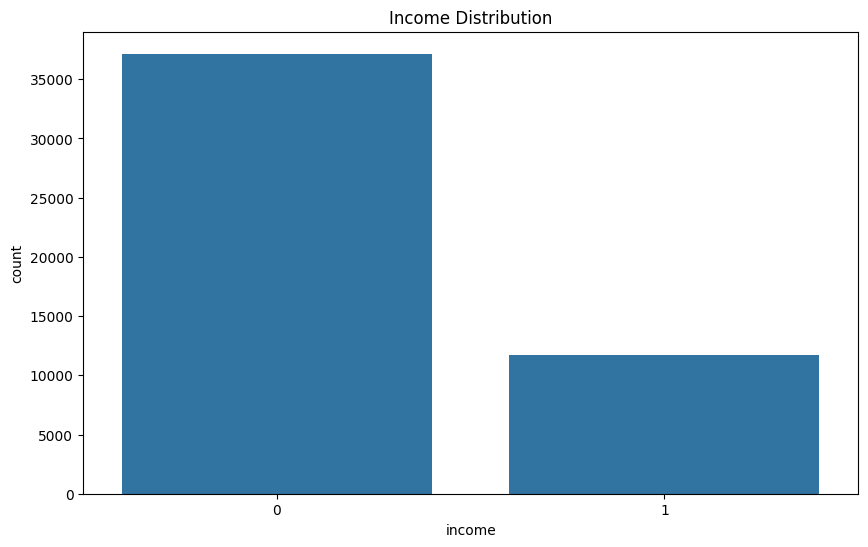

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=data)
plt.title("Income Distribution")
plt.show()


In [15]:
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8610912068789026

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      7431
           1       0.75      0.63      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



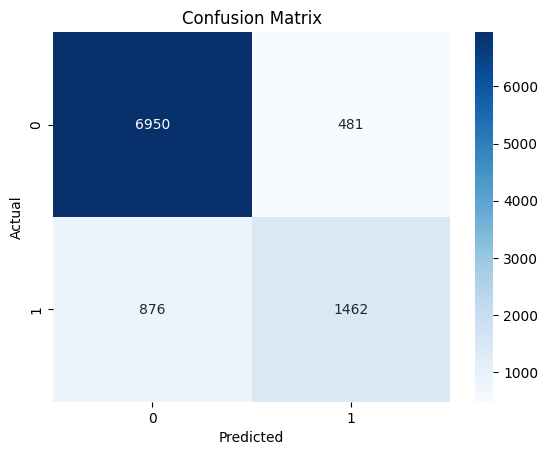

In [18]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


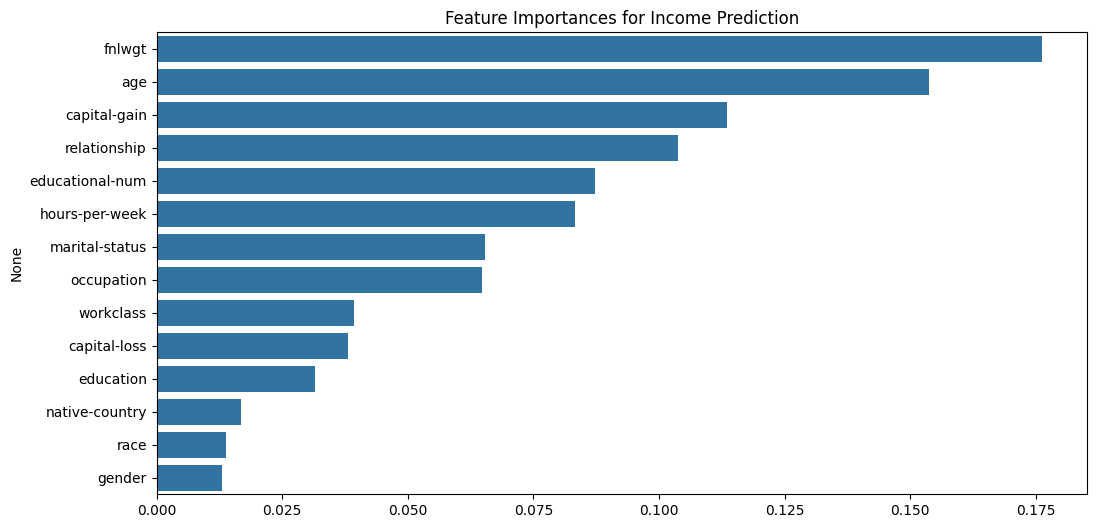

In [19]:
importances = model.feature_importances_
features = X.columns

feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Feature Importances for Income Prediction")
plt.show()


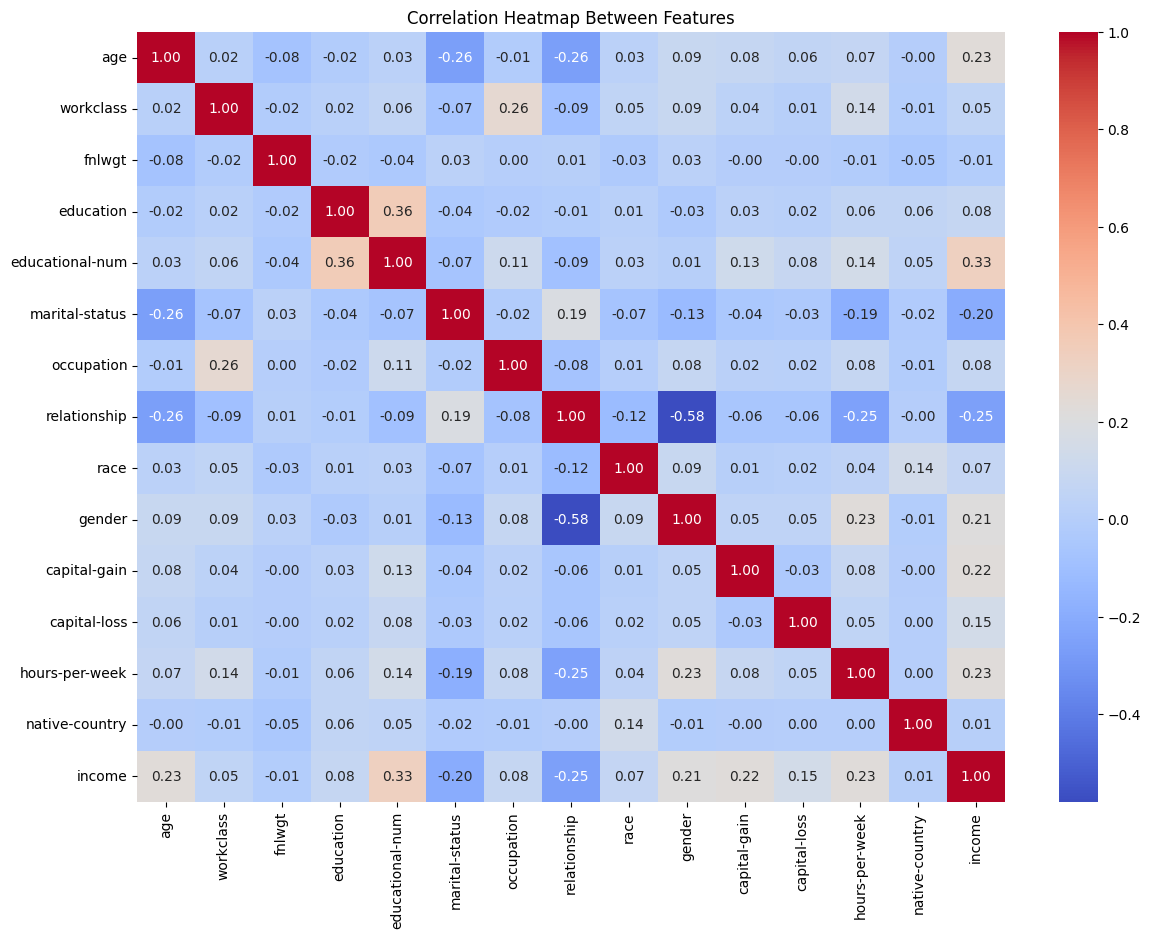

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap Between Features")
plt.show()


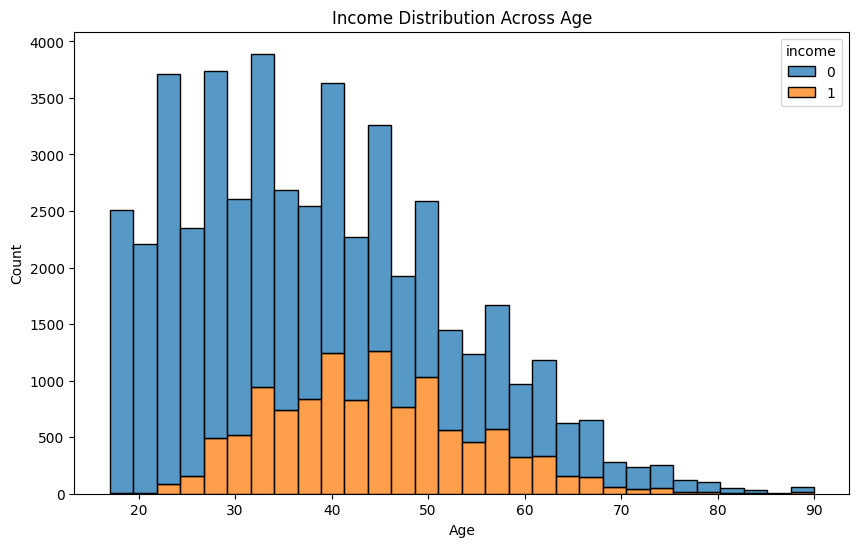

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='income', multiple='stack', bins=30)
plt.title("Income Distribution Across Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


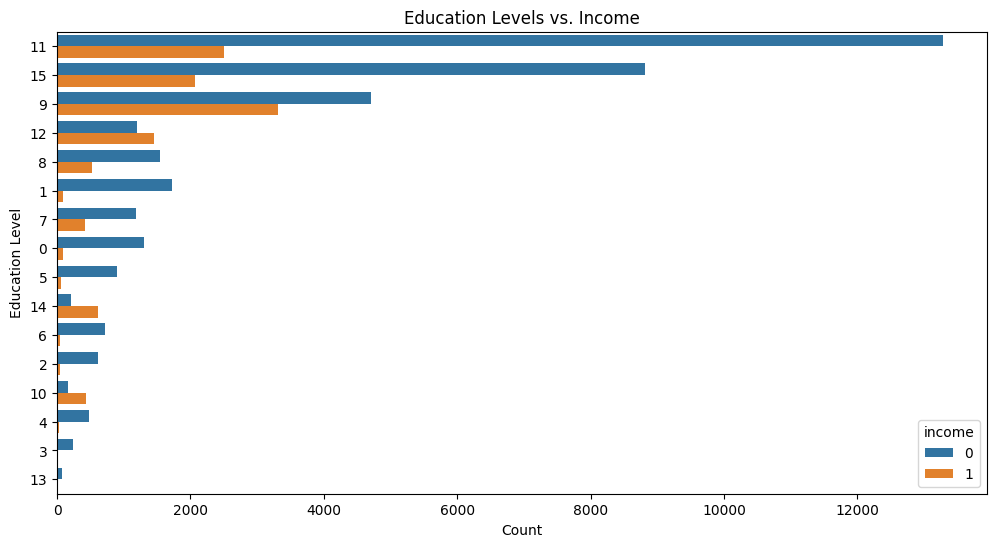

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(y='education', hue='income', data=data, order=data['education'].value_counts().index)
plt.title("Education Levels vs. Income")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()


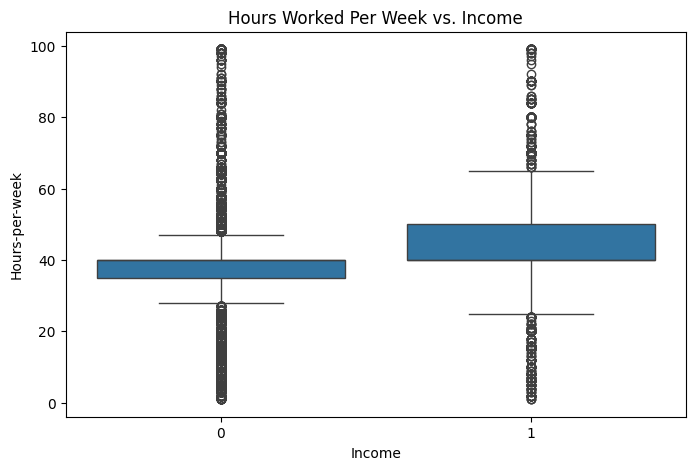

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title("Hours Worked Per Week vs. Income")
plt.xlabel("Income")
plt.ylabel("Hours-per-week")
plt.show()